# Interest rate on loan

### Import Libraries

In [200]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

#### Train Dataset

In [201]:
train = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\loan_data_train.csv')

In [202]:
train.head(2)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years


#### Test Data

In [203]:
test = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\loan_data_test.csv')

In [204]:
test.head(2)

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years


## Exploratory Data Analysis

#### Shape

In [205]:
print('Shape of training dataset :' , train.shape)
print('Shape of testing dataset :' , test.shape)

Shape of training dataset : (2200, 15)
Shape of testing dataset : (300, 14)


#### Validation Dataset is nothing but your x_test and y_test. validation dataset contains features and target columns . This validation data is unseen to your model because model get build or train on training data like x_train and y_train only. so after building model when we want to check accuracy for unseen dataset means In Ml we can say those model is perfect or good which having performance on unseen data. so validation data is for to just check performance validation of model

#### Columns

In [206]:
print(train.columns)

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')


In [207]:
print(test.columns)

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Loan.Length',
       'Loan.Purpose', 'Debt.To.Income.Ratio', 'State', 'Home.Ownership',
       'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')


#### Insights : test has not depending variable so its data given by client for prediction purpose

#### We just concate train and test data for to avoid  doubled data preprocessing and we split again into seperate train and test before building model or before feature scaling  or we can indisvidual data preprocess it also

#### we create one Data column for to just understand which one is train data and which one is test data

In [208]:
train['Data'] = 'Train'
test['Data'] = 'Test'

In [209]:
train.head(2)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Data
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train


In [210]:
test.head(2)

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Data
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year,Test
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years,Test


In [211]:
print('Training Dataset shape:' , train.shape)
print('Testing Dataset shape :' , test.shape)

Training Dataset shape: (2200, 16)
Testing Dataset shape : (300, 15)


### Concate the train and test

In [212]:
df = pd.concat([train , test] , axis  = 0 , ignore_index = True)

In [213]:
df.head(2)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Data
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train


In [214]:
df.tail(2)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Data
2498,36931.0,13600,13600,NaN,60 months,credit_card,12.85%,MN,RENT,5651.33,675-679,13,24383,0.0,10+ years,Test
2499,34744.0,6000,6000,NaN,36 months,debt_consolidation,7.64%,IL,MORTGAGE,5184.75,675-679,8,14422,0.0,2 years,Test


In [215]:
print('Shape of DataFrame is :' , df.shape)

Shape of DataFrame is : (2500, 16)


### Prepruning

#### ID feature has not make sense with dependent variable means its not significant for dependent variable . we well dropped it 

In [216]:
df.drop(['ID'] ,axis =1 , inplace = True)

### Make features names in proper format

##### Before transformation

In [217]:
print(df.columns)

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length', 'Data'],
      dtype='object')


##### After the transformation

In [218]:
df.columns = df.columns.str.replace('.' ,'_' , regex = True)

In [219]:
print(df.columns)

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'Data'],
      dtype='object')


#### Insights : We just replaced '.' with '_' and make features in proper format

### Check ambiguity values

In [220]:
for col in df.columns:
    
    
    print('**'*10 , col , '**'*10)
    print()
    print()
    
    #print(df[col].nunique())
    print(list(set(df[col])))
    print()
    print()
    
    #print(df[col].nunique())

******************** Amount_Requested ********************


[12300, '5525', '5750', '9200', '25800', '5450', '10075', 24625, '6075', '9325', 8250, '25200', 10300, '28350', '7125', 14400, '1450', '15475', '1550', '1625', '15800', '23300', 4200, 6250, '17625', '11500', '4950', '11100', '17975', '1125', '20000', '15000', 2200, 10400, 14500, '3725', '11975', 35000, '7450', '1200', '5650', 12500, 4325, '20375', '10400', '20950', '2225', '18400', '9450', '8700', '2875', '7275', '3200', '16550', 6400, 8450, '21000', '15200', 4375, '4350', '16500', '16950', '10850', 4400, '31075', '1000', '17500', '16350', '17350', 14675, '32000', 24925, '7750', '2650', '16450', 6500, '3000', '13075', '15175', 27000, '31000', '4825', '23000', 18825, '5075', '33000', '5875', 4500, 12700, 16800, 25000, '18825', '5175', '8400', 2500, '4700', '17325', '25225', '16400', 23000, '30075', '20800', '6400', '12825', 4600, 6650, '12100', 12800, '1400', '8250', 21000, '4200', '29000', '2500', '4000', '16800', '7575', '23

##### Insights : There are features contains ambiguity value like '.' and we need to transform them because model will not get understand it

### Sanity Check
##### Relevant vs Irrelevant features

In [221]:
df.dtypes

Amount_Requested                   object
Amount_Funded_By_Investors         object
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data                               object
dtype: object

#### Insights :  most of features are object so want convert into numeric data

#### We want to make this object  feature into numeric feature

In [222]:
# Amount_Requested - convert to object to numeric
# Amount_Funded_By_Investors - convert to object to numeric
# Interest_Rate  - convert to object to numeric
# Loan_Length - convert to object to numeric 
# Debt_To_Income_Ratio - convert to object to numeric 
# FICO_Range - convert to object to numeric 
# Open_CREDIT_Lines - convert to object to numeric 
# Revolving_CREDIT_Balance - convert to object to numeric 
# Employment_Length - convert to object to numeric 

### Amount_Requested

##### We have some ambiguity values so we treat them and make data into numeric 

In [223]:
df[df['Amount_Requested']== '.']

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data
371,.,1850,12.49%,36 months,home_improvement,20.56%,MD,MORTGAGE,3448.33,660-664,10,18749,5.0,< 1 year,Train
1357,.,12000,10.16%,36 months,debt_consolidation,27.48%,VA,MORTGAGE,5000.00,710-714,12,10490,0.0,7 years,Train
1791,.,15875,14.33%,36 months,small_business,17.44%,MD,MORTGAGE,3416.67,675-679,11,15891,0.0,2 years,Train
1991,.,7000,6.91%,36 months,credit_card,7.10%,CA,RENT,5000.00,715-719,8,7612,0.0,3 years,Train


#### OR

In [224]:
np.where(df['Amount_Requested'] == '.')

(array([ 371, 1357, 1791, 1991], dtype=int64),)

In [225]:
df['Amount_Requested'].isnull().sum()

1

###### OR

In [226]:
df.loc[df['Amount_Requested'] == '.' , 'Amount_Requested']

371     .
1357    .
1791    .
1991    .
Name: Amount_Requested, dtype: object

##### We fill ambiguity value by null and then make it into numeric

In [227]:
df['Amount_Requested'] = np.where(df['Amount_Requested']  == '.' , np.nan , df['Amount_Requested'])

In [228]:
df['Amount_Requested'].isnull().sum()

5

##### Insights : we have 5 null values now means that four '.' values has been convert to null and it already one null value there so it become 5

#### We typecast the feature into numeric

In [229]:
df['Amount_Requested'] = df['Amount_Requested'].astype(float)

#### If you are try to convert into integer then it show error because it has some null values and data type of null is float so we convert into float only

In [230]:
df['Amount_Requested'].dtypes

dtype('float64')

### Amount_Funded_By_Investors

In [231]:
df[df['Amount_Funded_By_Investors'] == '.']

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data
110,3000.0,.,17.44%,36 months,other,15.79%,MD,RENT,7952.0,660-664,4,12578,0.0,8 years,Train
1091,1000.0,.,13.16%,36 months,other,19.63%,MI,RENT,3500.0,670-674,9,11189,2.0,2 years,Train
1983,3000.0,.,8.59%,36 months,other,3.72%,MA,MORTGAGE,4167.0,765-769,4,7074,0.0,5 years,Train
2205,6000.0,.,NaN,36 months,home_improvement,2.52%,NJ,MORTGAGE,4800.0,750-754,.,1442,0.0,10+ years,Test


In [232]:
df.loc[df['Amount_Funded_By_Investors'] == '.' , 'Amount_Funded_By_Investors']

110     .
1091    .
1983    .
2205    .
Name: Amount_Funded_By_Investors, dtype: object

#### OR

In [233]:
np.where(df['Amount_Funded_By_Investors'] == '.')

(array([ 110, 1091, 1983, 2205], dtype=int64),)

In [234]:
df['Amount_Funded_By_Investors'].isnull().sum()

1

In [235]:
df.loc[df['Amount_Funded_By_Investors'] == '.' , 'Amount_Funded_By_Investors'] = np.nan

In [236]:
df['Amount_Funded_By_Investors'].isnull().sum()

5

##### Typecast it

In [237]:
df['Amount_Funded_By_Investors'] = pd.to_numeric(df['Amount_Funded_By_Investors'] ,errors = 'coerce')

##### Insights : When we performing pd.to_numeric one thing always keep in mind pd.to_numeric is workimg like where is it typecast is possible then it will typecast and if typecast is not possible then make that data is null like ambiguity value '98%' or '.' naturally it is not typecast it because its not pure values so we nedd to sort it like we need to remove % from number or we need to make '.' as np.nan then it will work otherwise it make this data as null . so that thing keep in mind while using pd,to_numeric

In [238]:
df['Amount_Funded_By_Investors'].isnull().sum()

5

In [239]:
df['Amount_Funded_By_Investors'].dtypes

dtype('float64')

### Interest_Rate

#### Interest Rate is Target column

In [240]:
df['Interest_Rate'].dtypes

dtype('O')

In [241]:
df[df['Interest_Rate'] == '.']

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data


In [242]:
df['Interest_Rate'].head(2)

0    18.49%
1    17.27%
Name: Interest_Rate, dtype: object

#### Here we ca not go with pd.to_numeric because it make all values which contains % as null because pd.to_numeric worl like if typecast is possible then make it typecasting . if type cast is not possible then make it that value as null so it make like '18.49%' as null

#### We need to data in pure format like we want to strip % from value

##### We transform it like

In [243]:
df['Interest_Rate'].replace('%' , '' , regex = True).astype(float)

0       18.49
1       17.27
2       14.33
3       16.29
4       12.23
        ...  
2495      NaN
2496      NaN
2497      NaN
2498      NaN
2499      NaN
Name: Interest_Rate, Length: 2500, dtype: float64

#### OR

In [244]:
df['Interest_Rate'].str.strip('%').astype(float)

0       18.49
1       17.27
2       14.33
3       16.29
4       12.23
        ...  
2495      NaN
2496      NaN
2497      NaN
2498      NaN
2499      NaN
Name: Interest_Rate, Length: 2500, dtype: float64

In [245]:
df['Interest_Rate'] = df['Interest_Rate'].str.replace('%' ,'' , regex = True).astype('float')

In [246]:
df['Interest_Rate'].dtypes

dtype('float64')

### Loan_Length

In [247]:
df['Loan_Length'].dtypes

dtype('O')

In [248]:
df['Loan_Length'].head(2)

0    60 months
1    60 months
Name: Loan_Length, dtype: object

#### We want to make data into pure numeric format so we need to drop the string

In [249]:
df[df['Loan_Length'] == '.']

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data
1218,13500.0,13500.0,14.33,.,debt_consolidation,31.70%,WV,RENT,4166.67,680-684,11,31168,0.0,1 year,Train


In [250]:
df.loc[df['Loan_Length'] == '.' , 'Loan_Length']

1218    .
Name: Loan_Length, dtype: object

##### We fill ambuiguity value

In [251]:
df['Loan_Length'] = np.where(df['Loan_Length']=='.' , np.nan , df['Loan_Length'])

##### You can try it by this way

##### replace

In [252]:
df['Loan_Length'].replace(' months' , '' , regex = True).astype(float)

0       60.0
1       60.0
2       36.0
3       36.0
4       60.0
        ... 
2495    60.0
2496    36.0
2497    36.0
2498    60.0
2499    36.0
Name: Loan_Length, Length: 2500, dtype: float64

##### Try with strip also

##### strip

In [253]:
df['Loan_Length'].str.strip(' months').astype(float)

0       60.0
1       60.0
2       36.0
3       36.0
4       60.0
        ... 
2495    60.0
2496    36.0
2497    36.0
2498    60.0
2499    36.0
Name: Loan_Length, Length: 2500, dtype: float64

#### Try with regex also

In [254]:
import re

In [255]:
for i in df['Loan_Length']:
    
    #print(i)
    print(re.search(r'\d*' , str(i)).group())

60
60
36
36
60
36
60
36
60
36
36
60
36
36
60
60
60
36
36
36
36
36
60
36
36
60
60
36
36
36
36
36
36
36
60
60
36
36
36
36
60
36
36
36
60
60
36
36
36
60
60
36
36
60
36
36
36
36
36
36
60
36
36
60
36
36
36
36
36
36
36
36
36
60
36
36
36
60
36
36
36
36
36
36
36
36
36
60
36
36
36
36
36
36
36
36
60
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
60
36
36
36
36
36
36
36
36
60
60
36
36
36
36
36
36
36
36
36
36
36
36
60
60
36
36
36
36
60
36
36
36
36
36
36
36
36
60
36
36
36
36
60
36
36
60
36
60
36
60
36
36
36
36
36
36
36
36
36
36
36
60
36
36
36
60
36
36
36
36
36
60
36
36
60
36
36
36
36
36
36
36
36
36
36
36
36
60
36
36
60
36
60
36
36
36
36
36
60
36
36
36
36
60
36
36
36
36
36
36
36
36
36
36
36
60
60
36
60
36
36
36
36
36
36
36
36
60
60
36
36
36
36
36
60
36
36
60
60
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
60
36
36
36
36
36
60
60
36
36
36
36
36
36
36
36
36
36
60
60
36
60
36
36
36
36
36
36
60
60
36
36
36
36
60
36
36
36
36
36
36
60
36
36
60
36
36
36
36
36
60
60
36
60
36
36
60
36
60
60
36
60
6

#### OR

##### regex with lambda

In [256]:
df['Loan_Length'] = df['Loan_Length'].apply(lambda x: re.search(r'\d*' , x).group() if type(x) == str else x)

#### This code says , re.search() find the number from feature and group make group that value and that conditional statements says if the value / iterable is string then give me value by group it and else its iterable is not str then kept as it is (means like int , float) 

In [257]:
df['Loan_Length'].head(2)

0    60
1    60
Name: Loan_Length, dtype: object

In [258]:
df['Loan_Length'] = df['Loan_Length'].astype(float)

In [259]:
df['Loan_Length'].dtypes

dtype('float64')

#### OR

#### regex with sub

In [260]:
for i in df['Loan_Length']:
    
    #print(i)
    print(re.sub(r'[a-zA-Z ]' , '' , str(i)))

60.0
60.0
36.0
36.0
60.0
36.0
60.0
36.0
60.0
36.0
36.0
60.0
36.0
36.0
60.0
60.0
60.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
60.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
60.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
60.0
60.0
36.0
36.0
36.0
60.0
60.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
60.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
60.0
36.0
60.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0


In [261]:
df['Loan_Length'].dtypes

dtype('float64')

### Debt_To_Income_Ratio

In [262]:
df['Debt_To_Income_Ratio'].head(2)

0    27.56%
1    13.39%
Name: Debt_To_Income_Ratio, dtype: object

#### check any ambiguity

In [263]:
df[df['Debt_To_Income_Ratio'] == '.']

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data


In [264]:
df['Debt_To_Income_Ratio'].dtypes

dtype('O')

#### We need to data in proper format 

#### repalce

In [265]:
df['Debt_To_Income_Ratio'].replace('%' , '' , regex = True).astype(float)

0       27.56
1       13.39
2        3.50
3       19.62
4       23.79
        ...  
2495    13.91
2496    17.22
2497     9.09
2498    12.85
2499     7.64
Name: Debt_To_Income_Ratio, Length: 2500, dtype: float64

#### strip

In [266]:
df['Debt_To_Income_Ratio'] = df['Debt_To_Income_Ratio'].str.strip('%').astype(float)

In [267]:
df['Debt_To_Income_Ratio'].dtypes

dtype('float64')

In [268]:
df['Debt_To_Income_Ratio'].head(2)

0    27.56
1    13.39
Name: Debt_To_Income_Ratio, dtype: float64

### FICO_Range

#### Fico range is nothing cibil score but this value we get as range or interval and we want numeric  value or fixed value here we get range so we think into another perspective  so we  have three options here

###### 1. we take least value or first value of range or interval resepctively
###### 2. we take highest value or second value of range or interval respectively.
###### 3.need to take avg of inetrval or range

##### As per our understanding we will go with average or mean because it more safer 

In [269]:
df['FICO_Range'].head(2)

0    720-724
1    710-714
Name: FICO_Range, dtype: object

In [270]:
s = df['FICO_Range'].str.split('-' , expand = True)

In [271]:
s = s.astype(int)

In [272]:
s.head(2)

,0,1
0,720,724
1,710,714


In [273]:
s.columns = ['column1' , 'column2']

In [274]:
s.head(2)

,column1,column2
0,720,724
1,710,714


In [275]:
df['FICO_Range'] = (s.column1 + s.column2) / 2

In [276]:
df['FICO_Range'].head()

0    722.0
1    712.0
2    692.0
3    712.0
4    732.0
Name: FICO_Range, dtype: float64

### Employment_Length

In [277]:
df['Employment_Length'].head()

0      5 years
1      4 years
2     < 1 year
3    10+ years
4    10+ years
Name: Employment_Length, dtype: object

####  we need to treat some ambiguity characters like + ,>. so here we make into fix value like 10+ as 10 and <1 as 0.5

In [278]:
df['Employment_Length'].isnull().sum()

78

In [279]:
data = df.copy()

In [280]:
data['Employment_Length'] = data['Employment_Length'].str.strip('years')

In [281]:
data['Employment_Length'].head()

0      5 
1      4 
2    < 1 
3    10+ 
4    10+ 
Name: Employment_Length, dtype: object

In [282]:
data['Employment_Length'].value_counts()

10+     653
< 1     249
2       243
3       235
5       202
4       191
1       177
6       163
7       127
8       108
9        72
.         2
Name: Employment_Length, dtype: int64

#### Here we make replace 10+ as 10 and < 1 as 0.5 . we just makegreater than or less than value in fixed number

In [283]:
data['Employment_Length'].replace('10+' , 10 , regex = True , inplace = True)
data['Employment_Length'].replace('< 1' , 0.5 , regex = True , inplace = True)

In [284]:
data['Employment_Length'].value_counts()

10     653
0.5    249
2      243
3      235
5      202
4      191
1      177
6      163
7      127
8      108
9       72
.        2
Name: Employment_Length, dtype: int64

#### Now come to '.' as nan

In [285]:
data.loc[data['Employment_Length'] == '.' , 'Employment_Length']

559     .
2447    .
Name: Employment_Length, dtype: object

In [286]:
data.loc[data['Employment_Length'] == '.' , 'Employment_Length'] = np.nan

In [287]:
data['Employment_Length'].value_counts()

10     653
0.5    249
2      243
3      235
5      202
4      191
1      177
6      163
7      127
8      108
9       72
Name: Employment_Length, dtype: int64

In [288]:
data['Employment_Length'] = data['Employment_Length'].astype(float)

In [289]:
df['Employment_Length'] = data ['Employment_Length']

In [290]:
df['Employment_Length'].value_counts()

10.0    653
0.5     249
2.0     243
3.0     235
5.0     202
4.0     191
1.0     177
6.0     163
7.0     127
8.0     108
9.0      72
Name: Employment_Length, dtype: int64

In [291]:
df['Employment_Length'].dtypes

dtype('float64')

### Open_CREDIT_Lines

In [292]:
df['Open_CREDIT_Lines'].head()

0    11
1    14
2    13
3    12
4     6
Name: Open_CREDIT_Lines, dtype: object

In [293]:
df.loc[df['Open_CREDIT_Lines'] == '.' , 'Open_CREDIT_Lines']

98      .
1383    .
1907    .
2205    .
2335    .
Name: Open_CREDIT_Lines, dtype: object

In [294]:
df.loc[df['Open_CREDIT_Lines'] == '.' , 'Open_CREDIT_Lines'] = np.nan

In [295]:
df['Open_CREDIT_Lines'] = df['Open_CREDIT_Lines'].astype(float)

In [296]:
df['Open_CREDIT_Lines'].dtypes

dtype('float64')

### Revolving_CREDIT_Balance

In [297]:
df['Revolving_CREDIT_Balance'].head()

0    15210
1    19070
2      893
3    38194
4    31061
Name: Revolving_CREDIT_Balance, dtype: object

In [298]:
df['Revolving_CREDIT_Balance'].value_counts()

0        31
0         7
12588     3
2174      3
6055      3
         ..
1577      1
16        1
12162     1
8807      1
14422     1
Name: Revolving_CREDIT_Balance, Length: 2371, dtype: int64

In [299]:
df.loc[df['Revolving_CREDIT_Balance'] == '.' , 'Revolving_CREDIT_Balance']

1374    .
1740    .
Name: Revolving_CREDIT_Balance, dtype: object

In [300]:
df.loc[df['Revolving_CREDIT_Balance'] == '.' , 'Revolving_CREDIT_Balance'] = np.nan

In [301]:
df['Revolving_CREDIT_Balance'] = df['Revolving_CREDIT_Balance'].astype(float)

In [302]:
df['Revolving_CREDIT_Balance'].dtypes

dtype('float64')

In [303]:
df.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
Data                               object
dtype: object

In [304]:
df.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data
0,25000.0,25000.0,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11.0,15210.0,3.0,5.0,Train
1,19750.0,19750.0,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14.0,19070.0,3.0,4.0,Train


#### We have converted True numeric data into numeric one now our data ready for preprocessing

## Data Preprocessig

### 1.Handling Missing Values

In [305]:
df.isnull().sum()

Amount_Requested                    5
Amount_Funded_By_Investors          5
Interest_Rate                     300
Loan_Length                         2
Loan_Purpose                        1
Debt_To_Income_Ratio                1
State                               1
Home_Ownership                      1
Monthly_Income                      3
FICO_Range                          0
Open_CREDIT_Lines                   9
Revolving_CREDIT_Balance            5
Inquiries_in_the_Last_6_Months      3
Employment_Length                  80
Data                                0
dtype: int64

#### Insights : we have major missing values in employment length 

In [306]:
test.shape

(300, 15)

#### Before filling the missing values always one thing keep in mind dont go with directly mean and median values always consult with your SME about is it data entry mistake or actually data is not present there and ask about logical guess for missing values to your SME.when fail to make logical guess then you can go with stastical technique if they allow

#### Here we doing practice so go with statistical techniques

In [307]:
df.skew()

Amount_Requested                  0.912158
Amount_Funded_By_Investors        0.931473
Interest_Rate                     0.283510
Loan_Length                       1.357067
Debt_To_Income_Ratio              0.155256
Monthly_Income                    8.471403
FICO_Range                        0.817522
Open_CREDIT_Lines                 0.884716
Revolving_CREDIT_Balance          5.379845
Inquiries_in_the_Last_6_Months    2.042125
Employment_Length                 0.073442
dtype: float64

#### Almost all features are rightly skewed so we imputation by median

In [308]:
df.isnull().sum() / len(df) * 100

Amount_Requested                   0.20
Amount_Funded_By_Investors         0.20
Interest_Rate                     12.00
Loan_Length                        0.08
Loan_Purpose                       0.04
Debt_To_Income_Ratio               0.04
State                              0.04
Home_Ownership                     0.04
Monthly_Income                     0.12
FICO_Range                         0.00
Open_CREDIT_Lines                  0.36
Revolving_CREDIT_Balance           0.20
Inquiries_in_the_Last_6_Months     0.12
Employment_Length                  3.20
Data                               0.00
dtype: float64

In [309]:
df.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
Data                               object
dtype: object

In [310]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

#### Missing value imputation in numerical data

In [311]:
# for col in df.columns[:-1]:
    
#     if col != 'Interest_Rate' and df[col].dtypes != object:
        
#         df[col].fillna(df[col].median() , inplace = True)

In [312]:
df.isnull().sum()

Amount_Requested                    5
Amount_Funded_By_Investors          5
Interest_Rate                     300
Loan_Length                         2
Loan_Purpose                        1
Debt_To_Income_Ratio                1
State                               1
Home_Ownership                      1
Monthly_Income                      3
FICO_Range                          0
Open_CREDIT_Lines                   9
Revolving_CREDIT_Balance            5
Inquiries_in_the_Last_6_Months      3
Employment_Length                  80
Data                                0
dtype: int64

##### Missing value imputation of object columns

In [313]:
# for col in df.columns[:-1]:
    
#     if col != 'Interest_Rate' and df[col].dtypes== object:
        
        
#         df[col].fillna(df[col].mode()[0] , inplace = True)

In [314]:
df.isnull().sum()

Amount_Requested                    5
Amount_Funded_By_Investors          5
Interest_Rate                     300
Loan_Length                         2
Loan_Purpose                        1
Debt_To_Income_Ratio                1
State                               1
Home_Ownership                      1
Monthly_Income                      3
FICO_Range                          0
Open_CREDIT_Lines                   9
Revolving_CREDIT_Balance            5
Inquiries_in_the_Last_6_Months      3
Employment_Length                  80
Data                                0
dtype: int64

#### Insights : Done with missing values

### 2.Handing the outliers

#### Before proceed for outliers always think about numerical continous column

##### How to decide which is numerical continous column :


##### 1. all object column is categorical columns
##### 2. numerical column with less unique values : i.e. categorical column
##### 3.numerical column with large unique values : i.e. numerical continous column

##### I will check the outliers in numerical continous columns

#### Numerical continous columns

In [315]:
num_cols = []
for col in df.columns:
    
    if df[col].dtype != object  and df[col].nunique() > 5 and col != 'Interest_Rate':
        
        print(col ,':', df[col].nunique())
        num_cols.append(col)

Amount_Requested : 380
Amount_Funded_By_Investors : 709
Debt_To_Income_Ratio : 1669
Monthly_Income : 631
FICO_Range : 38
Open_CREDIT_Lines : 29
Revolving_CREDIT_Balance : 2348
Inquiries_in_the_Last_6_Months : 10
Employment_Length : 11


#### Insights : Numerical continous columns because its count of unique values is large

In [316]:
print(num_cols)

['Amount_Requested', 'Amount_Funded_By_Investors', 'Debt_To_Income_Ratio', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months', 'Employment_Length']


#### Insights : I will check outliers on numerical continous columns only

In [317]:
df[num_cols].head(2)

,Amount_Requested,Amount_Funded_By_Investors,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,25000.0,25000.0,27.56,8606.56,722.0,11.0,15210.0,3.0,5.0
1,19750.0,19750.0,13.39,6737.50,712.0,14.0,19070.0,3.0,4.0


#### Visualization of outliers

#### You can visualize outliers by this way also

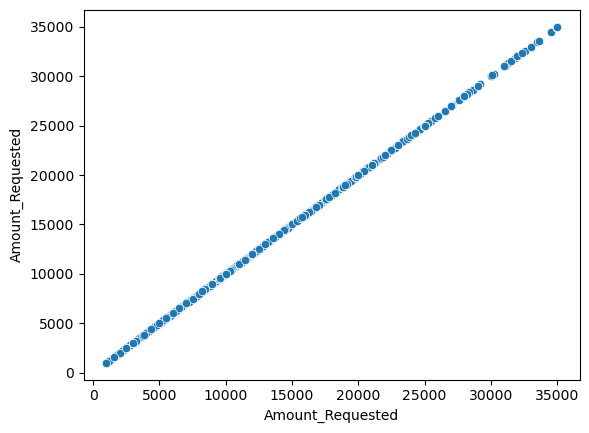

In [318]:
sns.scatterplot(data = df ,  x= 'Amount_Requested' , y = 'Amount_Requested' )
plt.show()

##### You can visualize by this way also

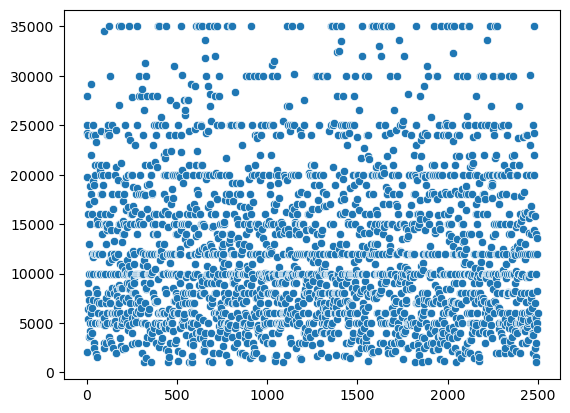

In [319]:
sns.scatterplot(x = df['Amount_Requested'].index , y = df['Amount_Requested'].values)
plt.show()

# on x axis plot index and y axis plot values

In [320]:
df.shape

(2500, 15)

In [321]:
len(num_cols)

9

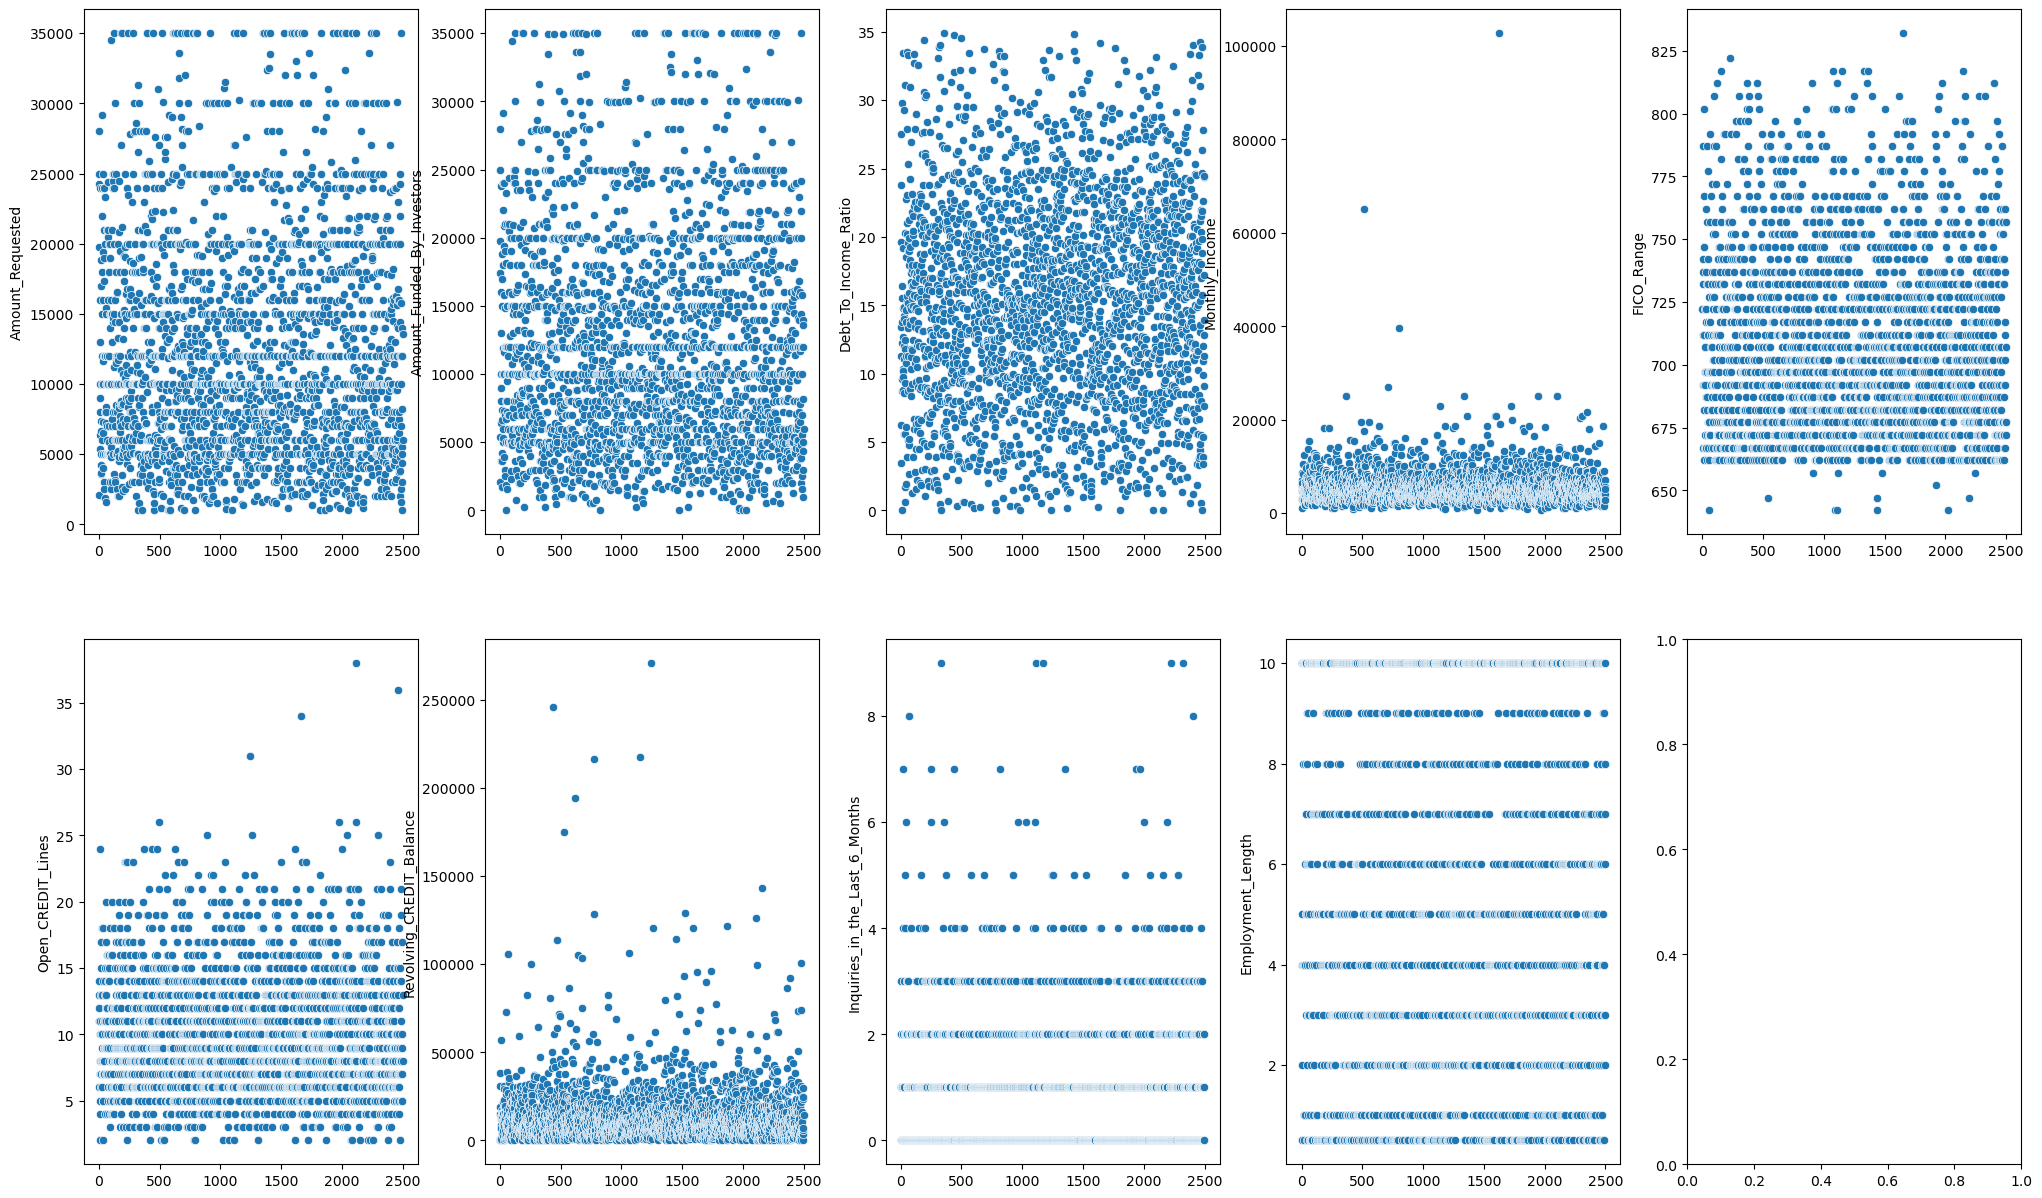

In [322]:
try :
    
    f , a = plt.subplots(2,5 , figsize = (25,15) , dpi = 100)
    
    ind = 0
    
    for i in range(2):
        
        for j in range(5):
            
            sns.scatterplot(x = df[num_cols[ind]].index , y = df[num_cols[ind]] , ax = a[i , j])
            
            ind = ind + 1
            
    plt.tight_layout()
    plt.subplot_adjust()
            
    plt.show()
            
except:
    
    pass

##### Insights : which data is scattered then this data is continous column and which data is present in line that data is your categorical data

#### like , 

##### numerical continous data : 'Amount_Requested','Amount_Funded_By_Investors','Debt_To_Income_Ratio','Monthly_Income','Revolving_CREDIT_Balance'  because it contains scatter data

##### and  'FICO_Range',  'Open_CREDIT_Lines' are  also categorical data but its count of unique value is more as compare to other categorical columns like 'Inquiries_in_the_Last_6_Months',  'Employment_Length'

##### categorical columns like 'Inquiries_in_the_Last_6_Months', 'Employment_Length' . This are pure categorical columns because its count of unique values is also less 


##### so we dropped 'Inquiries_in_the_Last_6_Months', 'Employment_Length' from num column for treating outliers on numerical continous columns

In [323]:
num_cols = num_cols[:7]

In [324]:
num_cols

['Amount_Requested',
 'Amount_Funded_By_Investors',
 'Debt_To_Income_Ratio',
 'Monthly_Income',
 'FICO_Range',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance']

##### Again visualize new num cols 

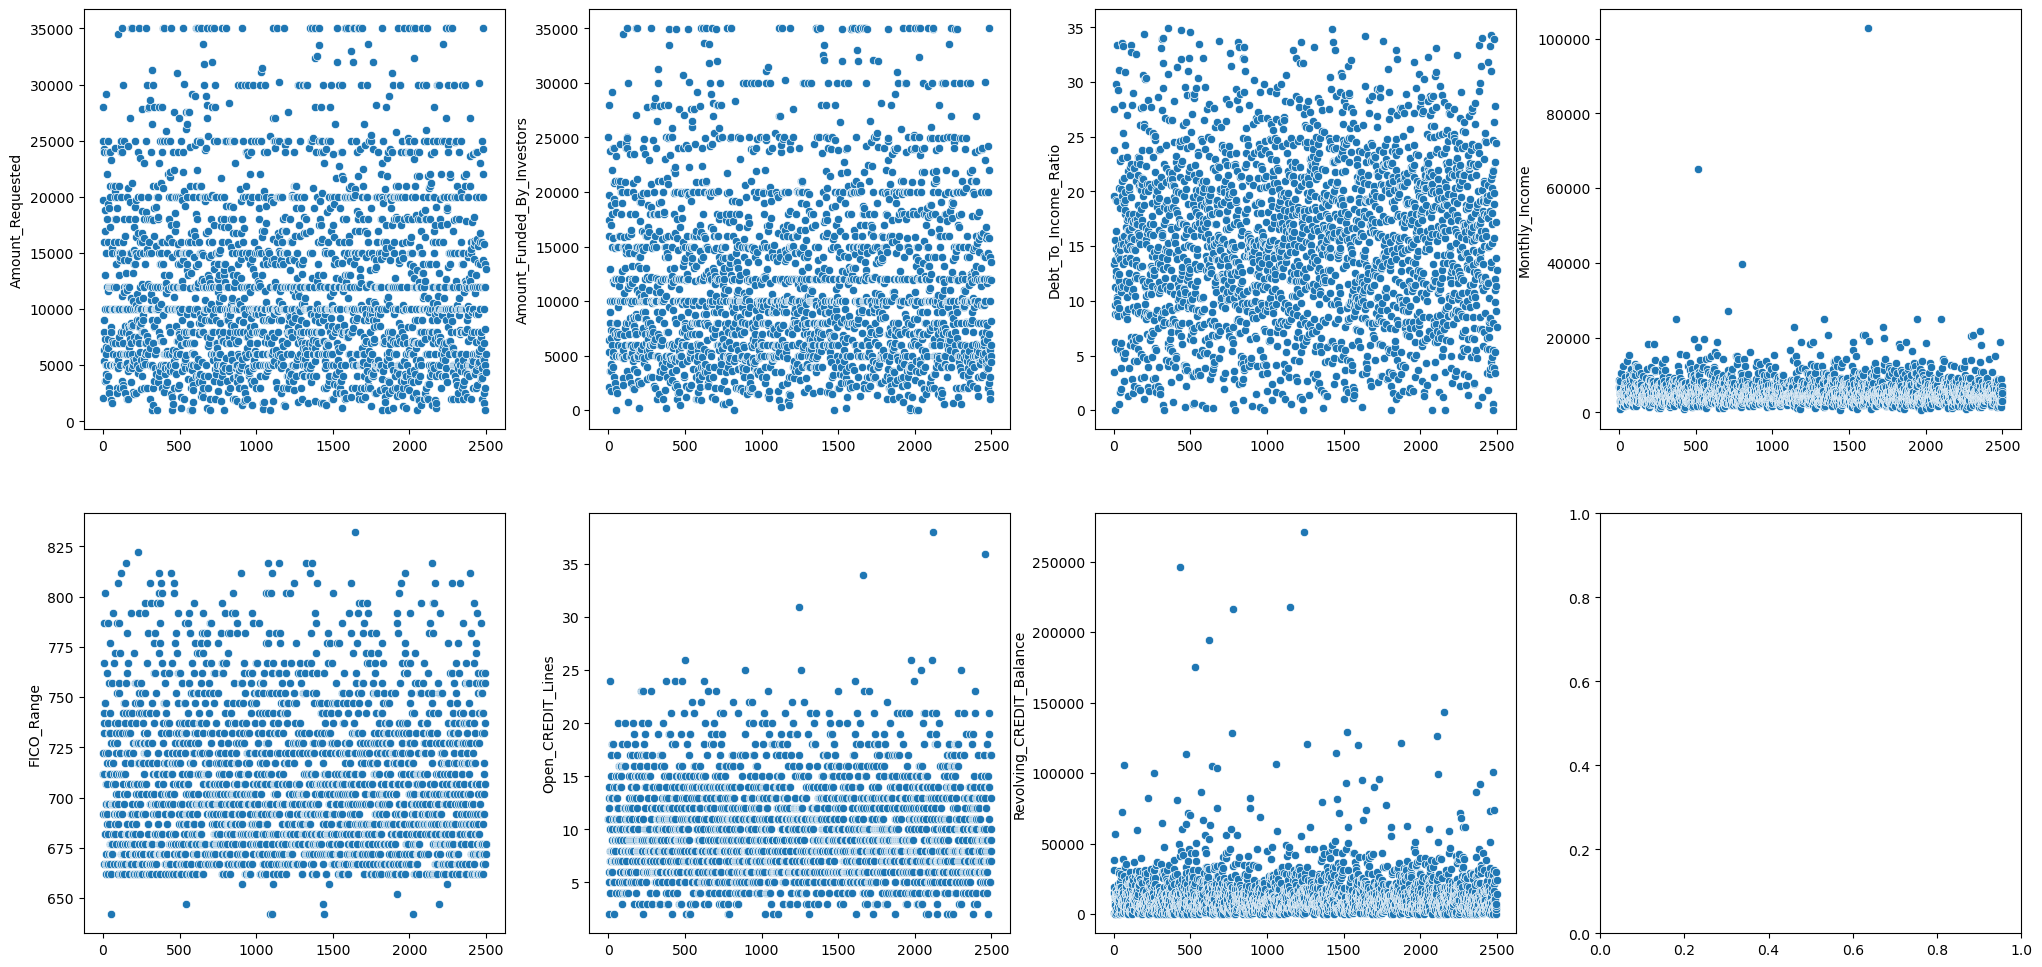

In [325]:
try:
    
    f , a = plt.subplots(2,4, figsize = (25 , 12) , dpi = 100)
    
    ind = 0
    
    for i in range(2):
        
        for j in range(4):
            
            sns.scatterplot(x = df[num_cols[ind]].index , y = df[num_cols[ind]] , ax = a[i , j])
            ind = ind + 1
    
    
    
    plt.tight_layout()
    plt.show()
    
    
except:
    
    pass
    

##### By cross validate for capping threshold you can visulaize boxplot also

##### like this ,

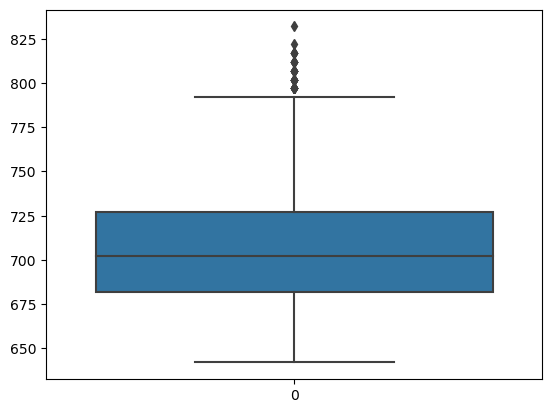

In [326]:
sns.boxplot(df['FICO_Range'])
plt.show()

##### By boxplot

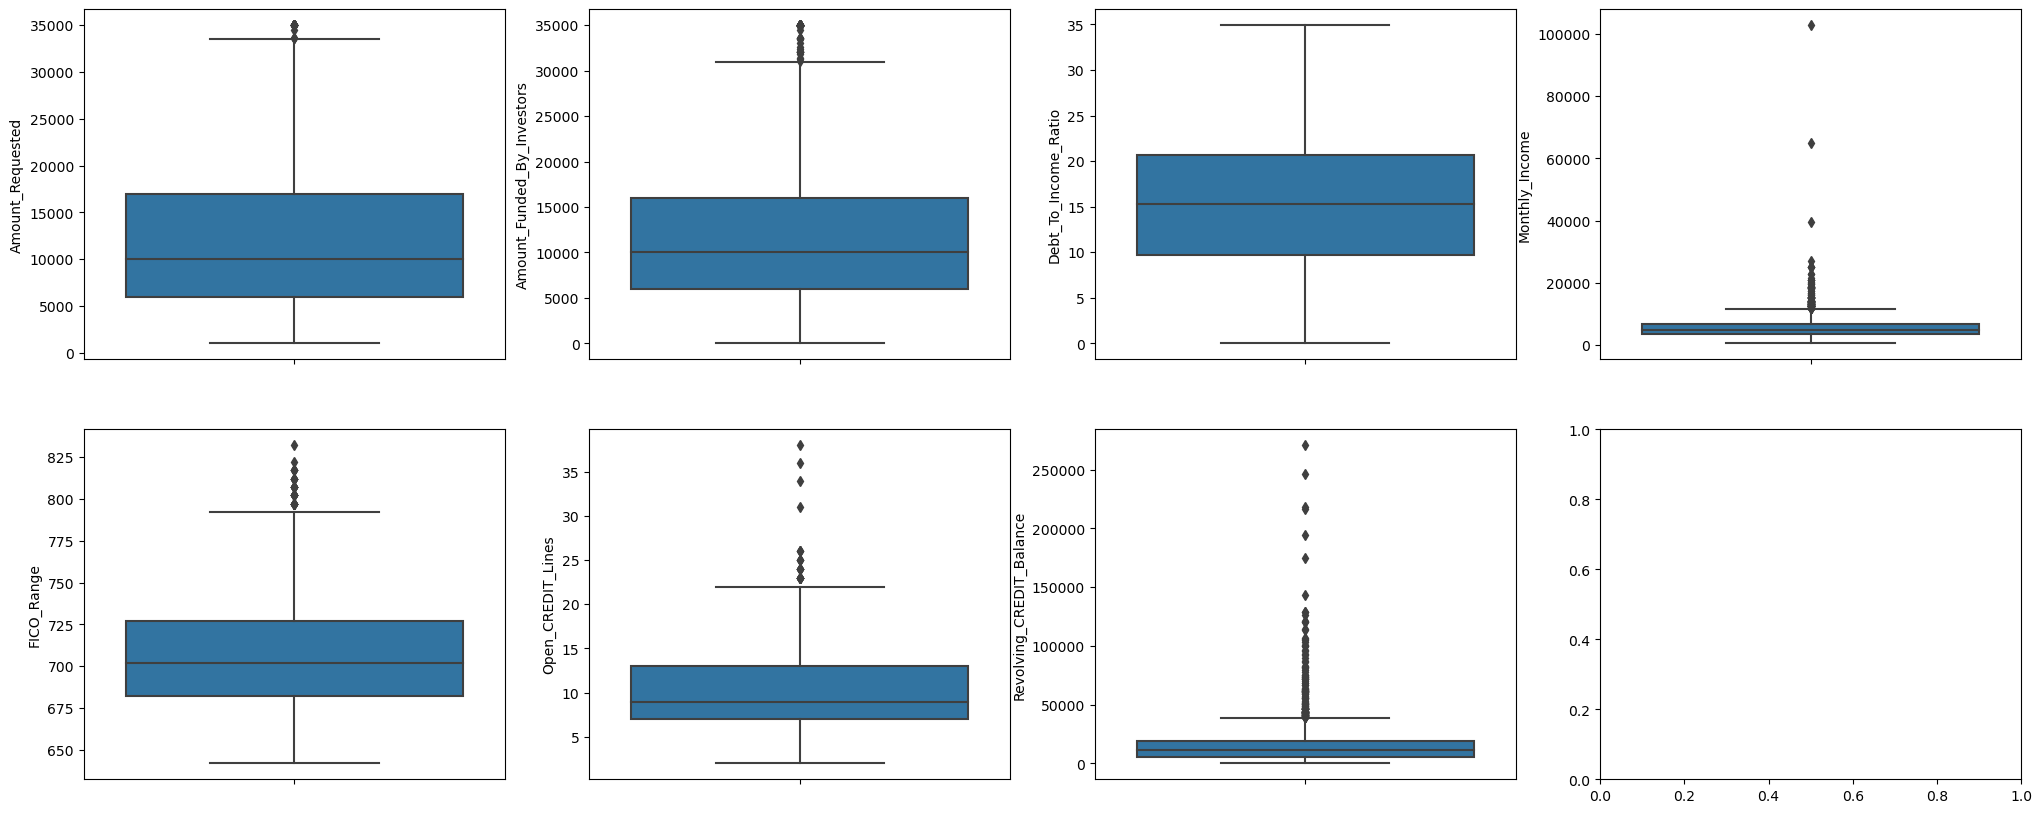

In [327]:
try :
    
    f , a = plt.subplots(2 , 4 , figsize = (25 , 10) , dpi = 100)
    
    ind = 0
    
    for i in range(2):
        
        for j in range(4):
            
            sns.boxplot(y = df[num_cols[ind]] , ax = a[i , j])
            
            ind = ind + 1
            
    
    plt.tight_layout()
    plt.show()
    
except:
    
    pass
    

#### Capping Outliers

#### Here we will use clip  function it clip your data in lower limit and upper limit

In [328]:
def detect_outliers(col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.50)
        
    IQR = Q3 - Q1
        
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    
    df[col].clip(lower , upper , inplace = True)

In [329]:
for i in df[num_cols].columns:
    
    detect_outliers(i)

##### Again check outliers are capped or not

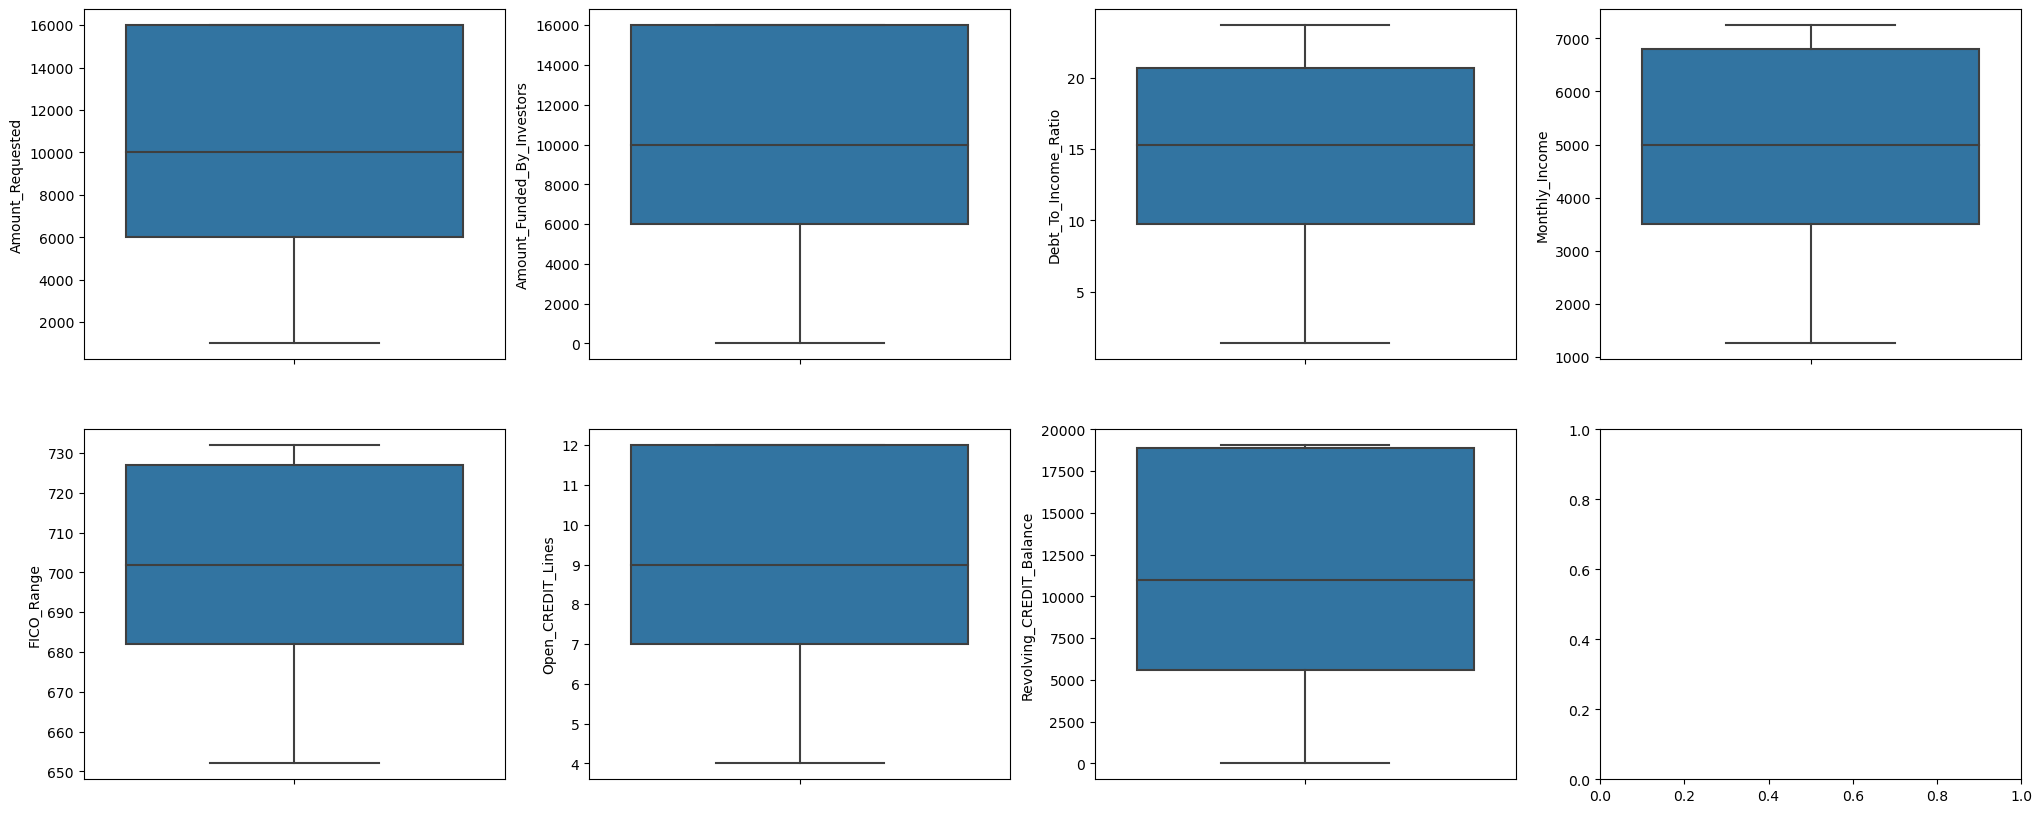

In [330]:
try:
    
    f , a = plt.subplots(2 , 4 , figsize = (25 , 10) , dpi = 100)
    
    ind = 0
    
    for i in range(2):
        
        for j in range(4):
            
            sns.boxplot(y = df[num_cols[ind]] , ax = a[i , j])
            ind = ind + 1
            
            
    plt.tight_layout()
    plt.show()
    
    
except:
    
    pass

##### Insights : capped the outliers in numerical continous columns

#### We checked outliers on categorical

##### Categorical columns

In [331]:
for col in df.columns[:-1]:
    
    if col not in num_cols:
        
        print(col)
    
    

Interest_Rate
Loan_Length
Loan_Purpose
State
Home_Ownership
Inquiries_in_the_Last_6_Months
Employment_Length


#### Drop the unwanted columns

#### we dropping Interest Rate and State and state has not make any imact on prediction means every state has same banking policy or locality is not make any impact

In [332]:
df.drop(['State'] , axis = 1, inplace = True)

In [333]:
df.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data
0,16000.0,16000.0,18.49,60.0,debt_consolidation,23.6825,MORTGAGE,7250.0,722.0,11.0,15210.00,3.0,5.0,Train
1,16000.0,16000.0,17.27,60.0,debt_consolidation,13.3900,MORTGAGE,6737.5,712.0,12.0,19058.75,3.0,4.0,Train


#### Make list of categorical columns

In [334]:
cat_cols = []
for col in df.columns[:-1]:
    
    if col not in num_cols and col != 'Interest_Rate':
        
        cat_cols.append(col)

In [335]:
print(cat_cols)

['Loan_Length', 'Loan_Purpose', 'Home_Ownership', 'Inquiries_in_the_Last_6_Months', 'Employment_Length']


##### Before proceed to outliers on categorical columns we always check with unique counts and occurance of that unique value and binding the low occurances and make one large occurance menas it make less categories from more categories

#### Loan Length

In [336]:
df['Loan_Length'].value_counts()

36.0    1950
60.0     548
Name: Loan_Length, dtype: int64

##### Insights : Here no need to make binding because it already have only 2 values

##### Loan Purpose

In [337]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

#### Insights : Here we can perfrorm binding we can bind less occurance values

##### More number of unique values is bad thing

#### If any perticular unique value / category make any negligible occurance with compare to others like renewable energy .it is an outlier.in categorical column

#### Binding Technique : It is technique it binding the low occurances unique values in one so it make increase its number of occurances . because lowe occurance is not make ny impact on dependent variable and it also treat an outlier so to aviod such thing we make binding

In [338]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

### Binding on Loan Purpose

##### Here we make binding multiple uniaue values in home_improvement and make home_improvement as one unique value so it aviod less occurance and less variance and make less unique values

In [339]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [340]:
df['Loan_Purpose'].replace(dict.fromkeys(df['Loan_Purpose'].value_counts()[2:].index , 'other') ).value_counts()

debt_consolidation    1307
other                  748
credit_card            444
Name: Loan_Purpose, dtype: int64

In [341]:
df['Loan_Purpose'].replace(dict.fromkeys(df['Loan_Purpose'].value_counts()[3:].index , 'home_improvement') , inplace = True )

In [342]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1307
home_improvement       548
credit_card            444
other                  200
Name: Loan_Purpose, dtype: int64

#### Binding on Home_Ownership

In [343]:
df['Home_Ownership'].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64

In [344]:
df['Home_Ownership'].isnull().sum()

1

In [345]:
df[df['Home_Ownership'] == 'NONE']

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data
1504,5000.0,4525.0,7.43,36.0,other,1.3825,NONE,NaN,732.0,NaN,NaN,NaN,0.5,Train


##### Its NONE is not null value its NONE is unique value here

In [346]:
df['Home_Ownership'].dropna()

0       MORTGAGE
1       MORTGAGE
2            OWN
3       MORTGAGE
4       MORTGAGE
          ...   
2495    MORTGAGE
2496         OWN
2497        RENT
2498        RENT
2499    MORTGAGE
Name: Home_Ownership, Length: 2499, dtype: object

In [347]:
df['Home_Ownership'].shape

(2500,)

In [348]:
len(df['Home_Ownership'].dropna())

2499

#### This NONE is not null here its unique value. means in Home Ownership might be they don't know who is owner. but its no missing value

##### Here we can bine other and NONE in Own 

In [349]:
df['Home_Ownership'].replace(dict.fromkeys(df['Home_Ownership'].value_counts()[3:].index , 'OWN') , inplace = True)

In [350]:
df['Home_Ownership'].value_counts()

MORTGAGE    1147
RENT        1146
OWN          206
Name: Home_Ownership, dtype: int64

In [351]:
len(df[df['Home_Ownership'] == 'OWN']) / 2

103.0

##### Insights : match the counts of other , own , None  , 5 , 200 , 1 so summation is 206. so we get perfectly bind

#### Binding  Inquiries_in_the_Last_6_Months

#### We can make here bindin from 3.0 to 8.0 and make one unique value

In [352]:
df['Inquiries_in_the_Last_6_Months'].value_counts() 

0.0    1249
1.0     657
2.0     336
3.0     169
4.0      50
5.0      14
6.0       8
7.0       7
9.0       5
8.0       2
Name: Inquiries_in_the_Last_6_Months, dtype: int64

In [353]:
df['Inquiries_in_the_Last_6_Months'].replace(dict.fromkeys(df['Inquiries_in_the_Last_6_Months'].value_counts().index[3:] , 3.0)).value_counts()

0.0    1249
1.0     657
2.0     336
3.0     255
Name: Inquiries_in_the_Last_6_Months, dtype: int64

In [354]:
df['Inquiries_in_the_Last_6_Months'].replace(dict.fromkeys(df['Inquiries_in_the_Last_6_Months'].value_counts().index[3:] , 3.0),inplace = True)

In [355]:
df['Inquiries_in_the_Last_6_Months'].value_counts()

0.0    1249
1.0     657
2.0     336
3.0     255
Name: Inquiries_in_the_Last_6_Months, dtype: int64

#### Binding Employement Length

In [356]:
df['Employment_Length'].value_counts()

10.0    653
0.5     249
2.0     243
3.0     235
5.0     202
4.0     191
1.0     177
6.0     163
7.0     127
8.0     108
9.0      72
Name: Employment_Length, dtype: int64

#### Its fine no need to treate the unique values here

## 2.Encoding

In [357]:
df.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data
0,16000.0,16000.0,18.49,60.0,debt_consolidation,23.6825,MORTGAGE,7250.0,722.0,11.0,15210.00,3.0,5.0,Train
1,16000.0,16000.0,17.27,60.0,debt_consolidation,13.3900,MORTGAGE,6737.5,712.0,12.0,19058.75,3.0,4.0,Train


#### We doing encoding on that column which does not having numerical significance

In [358]:
for col in df.columns[:-1]:
    
    if df[col].dtype == object:
        
        print(col)

Loan_Purpose
Home_Ownership


##### Insights : We have only two columns Loan Purpose and Home Ownership for encoding

##### Now we need to understand which technique we have to use like onehotencoding or labelencoding

In [359]:
df['Loan_Purpose'].head()

0    debt_consolidation
1    debt_consolidation
2      home_improvement
3           credit_card
4           credit_card
Name: Loan_Purpose, dtype: object

In [360]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1307
home_improvement       548
credit_card            444
other                  200
Name: Loan_Purpose, dtype: int64

#### Insights : We have four categories only and our data is not in order or rank. means there is no nay order or rank for loan purpose like debt_consolidation has highest preference for loan or home improvement has lowest or credit card having middle or higher prefernce or order of loan purpose . so we can use onehotencode here.

#### OneHotEncode : when to use onehotencoder like when our categorical data is not in order / not in ordinal or not in rank that time we can use but one thing here onehotencoder create complexity of model as well multicollinearity . means it creat that no of columns which have that no of unique values.so there possibility of low occurances values or negligible values when we have large uniaue values . so while onehotencoding if we have large no of unique values then we can make low occurance to high occurance so it not create complexity of model.

#### OneHotEnoder

In [361]:
df = pd.get_dummies(data = df , columns = ['Loan_Purpose'])

In [362]:
df.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_other
0,16000.0,16000.0,18.49,60.0,23.6825,MORTGAGE,7250.0,722.0,11.0,15210.00,3.0,5.0,Train,0,1,0,0
1,16000.0,16000.0,17.27,60.0,13.3900,MORTGAGE,6737.5,712.0,12.0,19058.75,3.0,4.0,Train,0,1,0,0


In [363]:
print(df.columns)

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Debt_To_Income_Ratio', 'Home_Ownership',
       'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'Data', 'Loan_Purpose_credit_card',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_other'],
      dtype='object')


#### Home Ownership

In [364]:
df['Home_Ownership'].head()

0    MORTGAGE
1    MORTGAGE
2         OWN
3    MORTGAGE
4    MORTGAGE
Name: Home_Ownership, dtype: object

In [365]:
df['Home_Ownership'].value_counts()

MORTGAGE    1147
RENT        1146
OWN          206
Name: Home_Ownership, dtype: int64

##### Insights : It has three categories  MORTGAGE , RENT , OWN . here we looking for prediction of interest rate on loan.here own means who has own its house. means bank have highest probability of less risk factor. so we need to assign some order to this and after own we have mortgage have less risk factor so we need to assign order less than own and third is rent here bank has high probability of risk factor.so we need assign rder which is less than mortgage

### This is Ordinal encoding so always assign data in order not high not low . follows order according to there weightage.

# Ordinal Encoding

In [366]:
df['Home_Ownership'].replace({'OWN' : 3 , 'MORTGAGE': 2 , 'RENT' : 1} , inplace = True)

In [367]:
df['Home_Ownership'].value_counts()

2.0    1147
1.0    1146
3.0     206
Name: Home_Ownership, dtype: int64

#### Insights : We assign order to data but always keep in mind you assign that things should be in order only . not high not low

## KNN Imputer

##### Here we perform the knnimputer for to check any variance than mean , median , mode approach.

In [368]:
from sklearn.impute import KNNImputer

In [369]:
knn = KNNImputer(n_neighbors=5,
    weights='uniform')

In [370]:
df.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_other
0,16000.0,16000.0,18.49,60.0,23.6825,2.0,7250.0,722.0,11.0,15210.00,3.0,5.0,Train,0,1,0,0
1,16000.0,16000.0,17.27,60.0,13.3900,2.0,6737.5,712.0,12.0,19058.75,3.0,4.0,Train,0,1,0,0


In [374]:
features = df.drop(['Interest_Rate' , 'Data'] , axis = 1)

In [375]:
features.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_other
0,16000.0,16000.0,60.0,23.6825,2.0,7250.0,722.0,11.0,15210.00,3.0,5.0,0,1,0,0
1,16000.0,16000.0,60.0,13.3900,2.0,6737.5,712.0,12.0,19058.75,3.0,4.0,0,1,0,0


#### Fill the null values in features only.

In [377]:
features = knn.fit_transform(features)

In [392]:
df.columns.drop(['Interest_Rate' , 'Data'])

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Loan_Length',
       'Debt_To_Income_Ratio', 'Home_Ownership', 'Monthly_Income',
       'FICO_Range', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_home_improvement', 'Loan_Purpose_other'],
      dtype='object')

In [393]:
features= pd.DataFrame(features , columns = df.columns.drop(['Interest_Rate' , 'Data']))

In [394]:
Interest_Rate = pd.DataFrame(df['Interest_Rate'])

In [395]:
Data = pd.DataFrame(df['Data'])

In [397]:
df = pd.concat([features , Interest_Rate, Data] , axis = 1)

In [398]:
df.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_other,Interest_Rate,Data
0,16000.0,16000.0,60.0,23.6825,2.0,7250.0,722.0,11.0,15210.00,3.0,5.0,0.0,1.0,0.0,0.0,18.49,Train
1,16000.0,16000.0,60.0,13.3900,2.0,6737.5,712.0,12.0,19058.75,3.0,4.0,0.0,1.0,0.0,0.0,17.27,Train


### Split the data into independent and dependent variable

In [399]:
df.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_other,Interest_Rate,Data
0,16000.0,16000.0,60.0,23.6825,2.0,7250.0,722.0,11.0,15210.00,3.0,5.0,0.0,1.0,0.0,0.0,18.49,Train
1,16000.0,16000.0,60.0,13.3900,2.0,6737.5,712.0,12.0,19058.75,3.0,4.0,0.0,1.0,0.0,0.0,17.27,Train


#### Make segregate train data

In [400]:
train= df[df['Data'] == 'Train']

In [401]:
train.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_other,Interest_Rate,Data
0,16000.0,16000.0,60.0,23.6825,2.0,7250.0,722.0,11.0,15210.00,3.0,5.0,0.0,1.0,0.0,0.0,18.49,Train
1,16000.0,16000.0,60.0,13.3900,2.0,6737.5,712.0,12.0,19058.75,3.0,4.0,0.0,1.0,0.0,0.0,17.27,Train


In [402]:
test = df[df['Data'] == 'Test']

In [403]:
test.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_other,Interest_Rate,Data
2200,5000.0,5000.0,60.0,12.59,1.0,4416.67,692.0,12.0,7686.0,0.0,0.5,0.0,0.0,1.0,0.0,NaN,Test
2201,16000.0,16000.0,60.0,4.93,1.0,5258.50,712.0,6.0,11596.0,0.0,10.0,0.0,1.0,0.0,0.0,NaN,Test


#### Clean train data

In [404]:
train.drop(['Data'] , axis = 1 , inplace = True)

#### Features

In [405]:
x = train.drop(['Interest_Rate']  , axis = 1)

In [406]:
x.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_other
0,16000.0,16000.0,60.0,23.6825,2.0,7250.0,722.0,11.0,15210.00,3.0,5.0,0.0,1.0,0.0,0.0
1,16000.0,16000.0,60.0,13.3900,2.0,6737.5,712.0,12.0,19058.75,3.0,4.0,0.0,1.0,0.0,0.0


#### Target Variable

In [407]:
y = train[['Interest_Rate']]

In [408]:
y.head(2)

,Interest_Rate
0,18.49
1,17.27


#### Clean test data as well because it has dependent variable  and data variable so we need to remove it

In [409]:
test.drop(['Interest_Rate' , 'Data'] , axis = 1 , inplace = True)

In [410]:
test.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_other
2200,5000.0,5000.0,60.0,12.59,1.0,4416.67,692.0,12.0,7686.0,0.0,0.5,0.0,0.0,1.0,0.0
2201,16000.0,16000.0,60.0,4.93,1.0,5258.50,712.0,6.0,11596.0,0.0,10.0,0.0,1.0,0.0,0.0


In [411]:
print('Shape of DataFrame is :' , df.shape)
print('shape of train data is :' , train.shape)
print('Shape of test data is :' , test.shape)
print('Shape of Features are  :' , x.shape)
print('Shape of target variable is  :' , y.shape)

Shape of DataFrame is : (2500, 17)
shape of train data is : (2200, 16)
Shape of test data is : (300, 15)
Shape of Features are  : (2200, 15)
Shape of target variable is  : (2200, 1)


#### Train nd Test split

In [412]:
from sklearn.model_selection import train_test_split

In [413]:
l = train_test_split(x , y , test_size = 0.25 , random_state = 11)

In [414]:
len(l)

4

##### Its create 4 list or split in one list  . so just unpack this lists in x_train , x_val , y_train , y_val

In [415]:
x_train , x_val , y_train , y_val = train_test_split(x , y , test_size = 0.2 , random_state = 11)

In [416]:
print(x_train.shape , x_val.shape , y_train.shape , y_val.shape)

(1760, 15) (440, 15) (1760, 1) (440, 1)


#### X_train  , y_train data is for train the model
#### x_val , y_val data is for validation means accuracy check 

## Model

In [417]:
from sklearn.linear_model import LinearRegression

In [418]:
lr = LinearRegression()

#### Fit the model

In [419]:
lr.fit(x_train_trf , y_train)

LinearRegression()

#### Prediction on train data

In [420]:
y_train_pred_lr = lr.predict(x_train_trf)

In [421]:
y_train_pred_lr

array([[15.59376381],
       [ 7.68237992],
       [ 9.81655694],
       ...,
       [ 8.35816026],
       [ 6.85125   ],
       [16.98228968]])

##### Prediction on test data

In [422]:
y_val_pred_lr = lr.predict(x_val_trf)

In [423]:
print(y_val_pred_lr)

[[12.63857729]
 [13.80668641]
 [16.09407998]
 [ 6.82735537]
 [15.76936774]
 [15.79923697]
 [ 6.51170306]
 [17.5484168 ]
 [18.29740839]
 [14.31783262]
 [12.74537218]
 [10.30810314]
 [13.56160734]
 [13.55440049]
 [15.55008503]
 [15.40334641]
 [14.2937362 ]
 [14.62758187]
 [13.32470539]
 [ 6.78577002]
 [16.15740073]
 [18.19598749]
 [ 6.31476562]
 [15.25065557]
 [13.53050625]
 [14.40773396]
 [13.96328418]
 [11.36118181]
 [ 6.41992276]
 [13.42271787]
 [10.91935859]
 [16.91660611]
 [13.18392782]
 [22.04262099]
 [11.95348618]
 [15.01715393]
 [ 9.89208091]
 [19.63875822]
 [14.40819924]
 [11.9639903 ]
 [22.67731648]
 [17.57991958]
 [12.31866966]
 [12.32777836]
 [18.12353917]
 [10.54278218]
 [ 9.66723233]
 [11.76600274]
 [ 8.43563095]
 [19.39909241]
 [19.03918875]
 [12.96885525]
 [16.27231337]
 [22.67583964]
 [13.13321628]
 [ 8.75568421]
 [17.99062446]
 [ 8.52182282]
 [12.93085042]
 [12.76532213]
 [13.07468415]
 [10.36771196]
 [ 8.71292905]
 [13.26948603]
 [ 8.71762907]
 [14.23087987]
 [16.74804

###### Accuracy on training data

In [424]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error , mean_absolute_percentage_error

In [425]:
r2_score(y_train , y_train_pred_lr)

0.7802742799599601

In [426]:
lr.score(x_train_trf , y_train)

0.7802742799599601

#### Mean squared_Error

In [427]:
mean_squared_error(y_train , y_train_pred_lr)

3.8549767119184666

In [428]:
mean_absolute_error(y_train , y_train_pred_lr)

1.4948281926721387

#### Accuracy on testing data

In [429]:
r2_score(y_val , y_val_pred_lr)

0.761899884215708

In [430]:
lr.score(x_val_trf , y_val)

0.761899884215708

In [431]:
mean_absolute_error(y_val , y_val_pred_lr)

1.5078092333732354

In [432]:
mean_absolute_percentage_error(y_train , y_train_pred_lr)

0.12435191709515772

### Improve accuracy by Data preprocessing(null values , categories make equal variance) and hyperparameter tuning

### Pickle

In [433]:
import pickle

### Dump : For deploy

In [434]:
with open('linear_regression.pkl' , 'wb') as f:
    
    pickle.dump(lr  , f)

### Unpickle

### Load : For load means other to python

In [435]:
with open('linear_regression.pkl' ,'rb') as f:
    
    model = pickle.load(f)

In [436]:
model

LinearRegression()

In [437]:
test.isnull().sum()

Amount_Requested                   0
Amount_Funded_By_Investors         0
Loan_Length                        0
Debt_To_Income_Ratio               0
Home_Ownership                     0
Monthly_Income                     0
FICO_Range                         0
Open_CREDIT_Lines                  0
Revolving_CREDIT_Balance           0
Inquiries_in_the_Last_6_Months     0
Employment_Length                  0
Loan_Purpose_credit_card           0
Loan_Purpose_debt_consolidation    0
Loan_Purpose_home_improvement      0
Loan_Purpose_other                 0
dtype: int64

In [438]:
test_pred = model.predict(test)

In [439]:
print(test_pred)

[[15.13940096]
 [15.56666023]
 [10.47886995]
 [ 6.77186619]
 [14.09386628]
 [ 6.8999978 ]
 [16.07619871]
 [ 8.3473925 ]
 [15.26194269]
 [11.77723413]
 [ 9.07773321]
 [16.04408123]
 [10.37994586]
 [13.60284845]
 [14.27627578]
 [19.41621156]
 [ 8.71466272]
 [16.59008103]
 [13.61094476]
 [14.91095268]
 [21.49502621]
 [19.09332597]
 [ 9.06891988]
 [15.8460271 ]
 [ 8.00942851]
 [ 9.76702023]
 [13.1067385 ]
 [19.671039  ]
 [12.24793396]
 [16.54416057]
 [15.28583   ]
 [16.71324502]
 [12.40270464]
 [15.39090365]
 [13.60783596]
 [14.81880783]
 [17.15311205]
 [10.24115367]
 [11.14328954]
 [14.33703344]
 [14.50873757]
 [10.86138403]
 [15.38926107]
 [12.8157189 ]
 [17.22193156]
 [17.80272923]
 [14.72721136]
 [16.61131842]
 [16.63877115]
 [ 9.87462717]
 [13.9001208 ]
 [21.87981568]
 [12.05962691]
 [19.67361155]
 [13.25461987]
 [13.21261544]
 [17.03383577]
 [16.37829352]
 [ 9.69702513]
 [15.71399035]
 [13.36653059]
 [13.59900684]
 [ 8.54773885]
 [14.38641788]
 [ 7.6443722 ]
 [10.53326591]
 [12.56565